In [ ]:
!pip install geopandas
!pip install cartopy
!pip install shapely
!pip install --no-binary shapely shapely --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 73.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.3 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113651 sha256=e8d44899aa4d6415d14d3a1f35dc04aa327a9bb87ed77465573847e99b842f97
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225

In [ ]:
import geopandas as geo
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

###Connectivity graph of Go Air flights

####All flights of GoAir

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Flightschedule.xlsx")
df = df[df["Routing"]=="Non Stop"].reset_index()
df

,index,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,26,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,2023-02-02,2023-03-25
1,42,Abu Dhabi,Kannur,G8 54,22:20,03:40,03:50,Non Stop,Daily,-,2023-02-02,2023-03-25
2,45,Abu Dhabi,Kochi,G8 64,23:30,05:00,04:00,Non Stop,"Tu,W,F,Su",-,2023-02-02,2023-02-22
3,61,Abu Dhabi,Mumbai,G8 6,23:30,04:10,03:10,Non Stop,Daily,-,2023-02-02,2023-02-05
4,123,Ahmedabad,Bengaluru,G8 802,09:25,11:25,02:00,Non Stop,Daily,-,2023-02-02,2023-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...
369,3345,Varanasi,Bengaluru,G8 404,12:30,14:45,02:15,Non Stop,Sa,-,2023-02-02,2023-02-17
370,3346,Varanasi,Bengaluru,G8 404,12:30,14:45,02:15,Non Stop,"M,Tu,W,Th,F,Su",-,2023-02-02,2023-03-25
371,3350,Varanasi,Delhi,G8 183,18:40,20:05,01:25,Non Stop,Daily,-,2023-02-02,2023-02-15
372,3388,Varanasi,Mumbai,G8 350,13:50,16:10,02:20,Non Stop,Daily,-,2023-02-02,2023-02-15


In [ ]:
df["Origin"].unique()

array(['Abu Dhabi', 'Ahmedabad', 'Amritsar', 'Bagdogra', 'Bangkok',
       'Bengaluru', 'Chandigarh', 'Chennai', 'Dammam', 'Dehra Dun',
       'Delhi', 'Dubai', 'Goa', 'Goa-New Goa', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jammu', 'Kannur', 'Kochi', 'Kolkata', 'Kuwait', 'Leh',
       'Lucknow', 'Male', 'Mumbai', 'Muscat', 'Nagpur', 'Patna', 'Phuket',
       'Port Blair', 'Pune', 'Ranchi', 'Srinagar', 'Thoise', 'Varanasi'],
      dtype=object)

In [ ]:
a=df["Destination"].unique()
a.sort()
print(a)

['Abu Dhabi' 'Ahmedabad' 'Amritsar' 'Bagdogra' 'Bangkok' 'Bengaluru'
 'Chandigarh' 'Chennai' 'Dammam' 'Dehra Dun' 'Delhi' 'Dubai' 'Goa'
 'Goa-New Goa' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jammu' 'Kannur' 'Kochi'
 'Kolkata' 'Kuwait' 'Leh' 'Lucknow' 'Male' 'Mumbai' 'Muscat' 'Nagpur'
 'Patna' 'Phuket' 'Port Blair' 'Pune' 'Ranchi' 'Srinagar' 'Thoise'
 'Varanasi']


In [ ]:
# df1 = pd.read_csv("/content/drive/MyDrive/airports.csv")
# df1

In [ ]:
# df2=pd.DataFrame()

# for i in a:
#     for j in range(len(df1)):
#         if df1["municipality"][j]==i:
#             # print(i)
#             df2.append(df1.iloc[j])
# print(df2)

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

b={}

for i in a:
    location = geolocator.geocode(i)
    b.update({i:[location.latitude, location.longitude]})

print(b)
print(len(b),len(a))

{'Abu Dhabi': [24.4538352, 54.3774014], 'Ahmedabad': [23.0216238, 72.5797068], 'Amritsar': [31.6343083, 74.8736788], 'Bagdogra': [26.6988847, 88.3200303], 'Bangkok': [13.7524938, 100.4935089], 'Bengaluru': [12.9767936, 77.590082], 'Chandigarh': [30.72984395, 76.78414567016054], 'Chennai': [13.0836939, 80.270186], 'Dammam': [26.4367824, 50.1039991], 'Dehra Dun': [30.3255646, 78.0436813], 'Delhi': [28.6517178, 77.2219388], 'Dubai': [25.074282349999997, 55.18853865430702], 'Goa': [15.3004543, 74.0855134], 'Goa-New Goa': [15.5937836, 73.8126805], 'Guwahati': [26.1805978, 91.753943], 'Hyderabad': [17.38878595, 78.46106473453146], 'Jaipur': [26.9154576, 75.8189817], 'Jammu': [32.7185614, 74.8580917], 'Kannur': [11.8763836, 75.3737973], 'Kochi': [9.9674277, 76.2454436], 'Kolkata': [22.5726723, 88.3638815], 'Kuwait': [29.2733964, 47.4979476], 'Leh': [34.1642029, 77.5848133], 'Lucknow': [26.8381, 80.9346001], 'Male': [4.1779879, 73.5107387], 'Mumbai': [19.0785451, 72.878176], 'Muscat': [23.6151

In [ ]:
print(b["Abu Dhabi"][0])

24.4538352


In [ ]:
print(df["Origin"][0])

Abu Dhabi


In [ ]:
path = geo.datasets.get_path('naturalearth_lowres')
bord = geo.read_file(path)

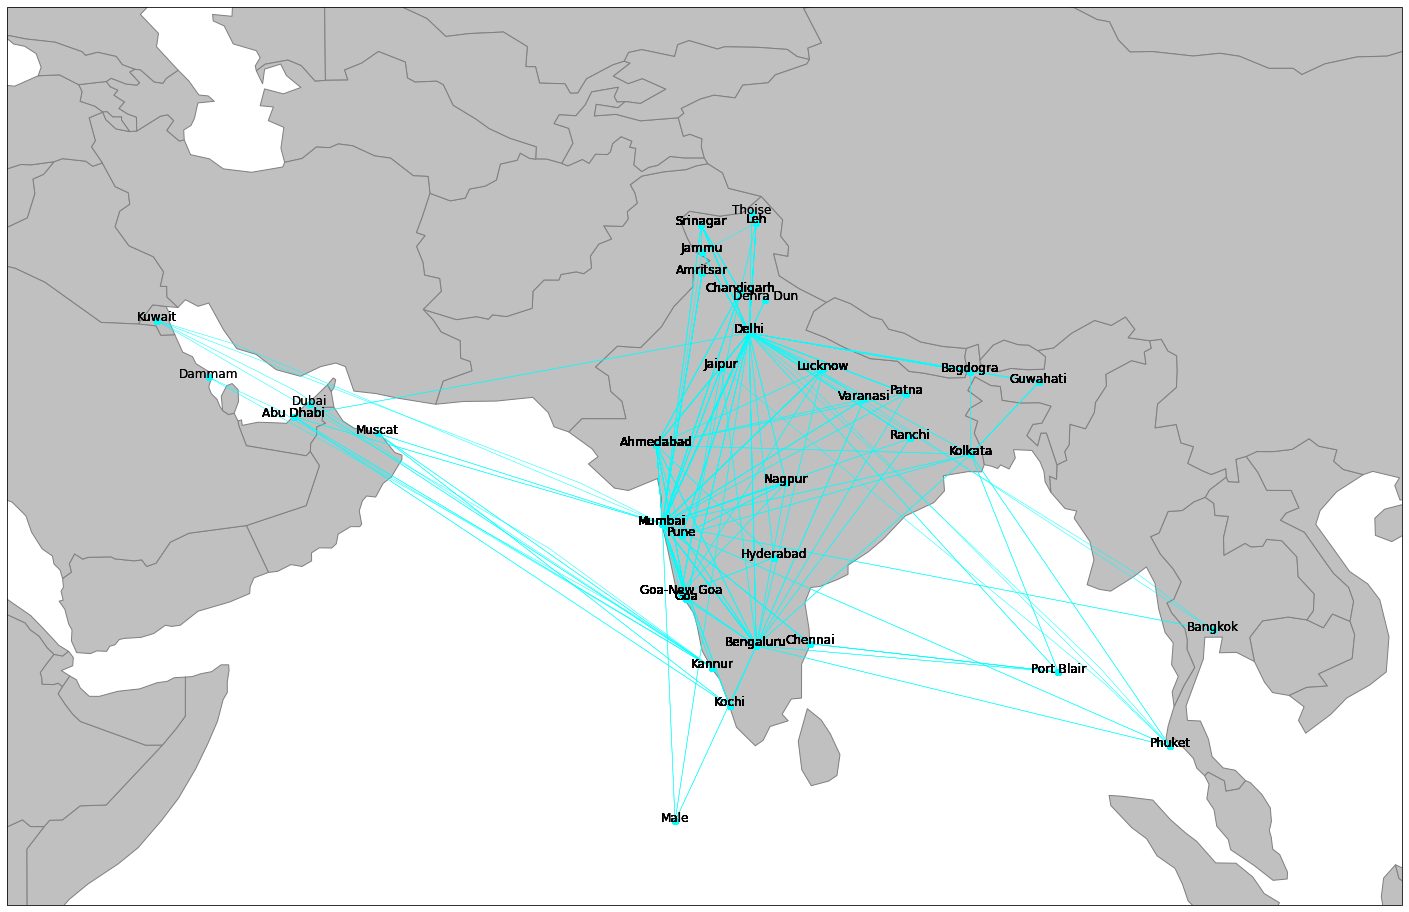

In [ ]:
plt.figure(figsize=(25,25))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([40, 110, 0, 45], crs=ccrs.PlateCarree())

for i in range(len(df)):

    lat1, lon1 = b[df["Origin"][i]][0], b[df["Origin"][i]][1]
    lat2, lon2 = b[df["Destination"][i]][0], b[df["Destination"][i]][1]

    plt.plot([lon1, lon2], [lat1, lat2], linewidth=0.5, color="cyan", marker='o',transform=ccrs.Geodetic())

    plt.text(lon1, lat1, df["Origin"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic())
    plt.text(lon2, lat2, df["Destination"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic())


bord.plot(ax=ax,facecolor='silver', edgecolor='grey')
plt.show()

#thickness of text indicates the no of flights to and from that airport

####Cleaner view considering only unique routes

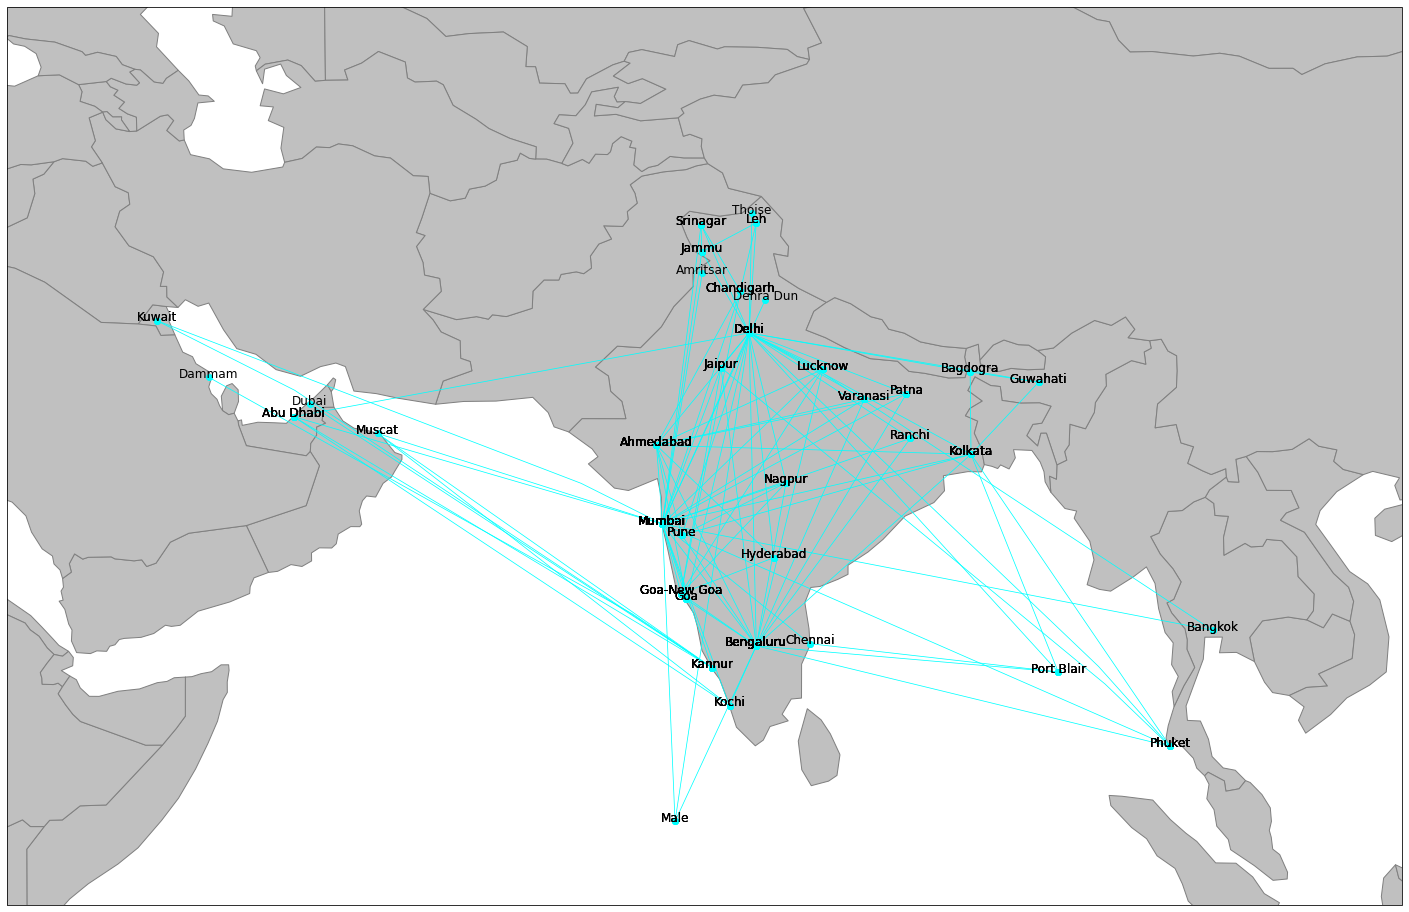

In [ ]:
unique_routes=[]
cities=[]
plt.figure(figsize=(25,25))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([40, 110, 0, 45], crs=ccrs.PlateCarree())

for i in range(len(df)):
    if [df["Origin"][i],df["Destination"][i]] not in unique_routes and [df["Destination"][i],df["Origin"][i]] not in unique_routes:
        unique_routes.append([df["Origin"][i],df["Destination"][i]])

        lat1, lon1 = b[df["Origin"][i]][0], b[df["Origin"][i]][1]
        lat2, lon2 = b[df["Destination"][i]][0], b[df["Destination"][i]][1]

        plt.plot([lon1, lon2], [lat1, lat2], linewidth=0.75, color="cyan", marker='o',transform=ccrs.Geodetic())

        # if df["Origin"][i] not in cities:
        #     cities.append(df["Origin"][i])
        plt.text(lon1, lat1, df["Origin"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic())

        # if df["Destination"][i] not in cities:
        #     cities.append(df["Destination"][i])
        plt.text(lon2, lat2, df["Destination"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic())



bord.plot(ax=ax,facecolor='silver', edgecolor='grey')
plt.show()
#thickness of text indicates the no of flights to and from that airport

####Domestic flights only

<ipython-input-131-a76ef2e026c9>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


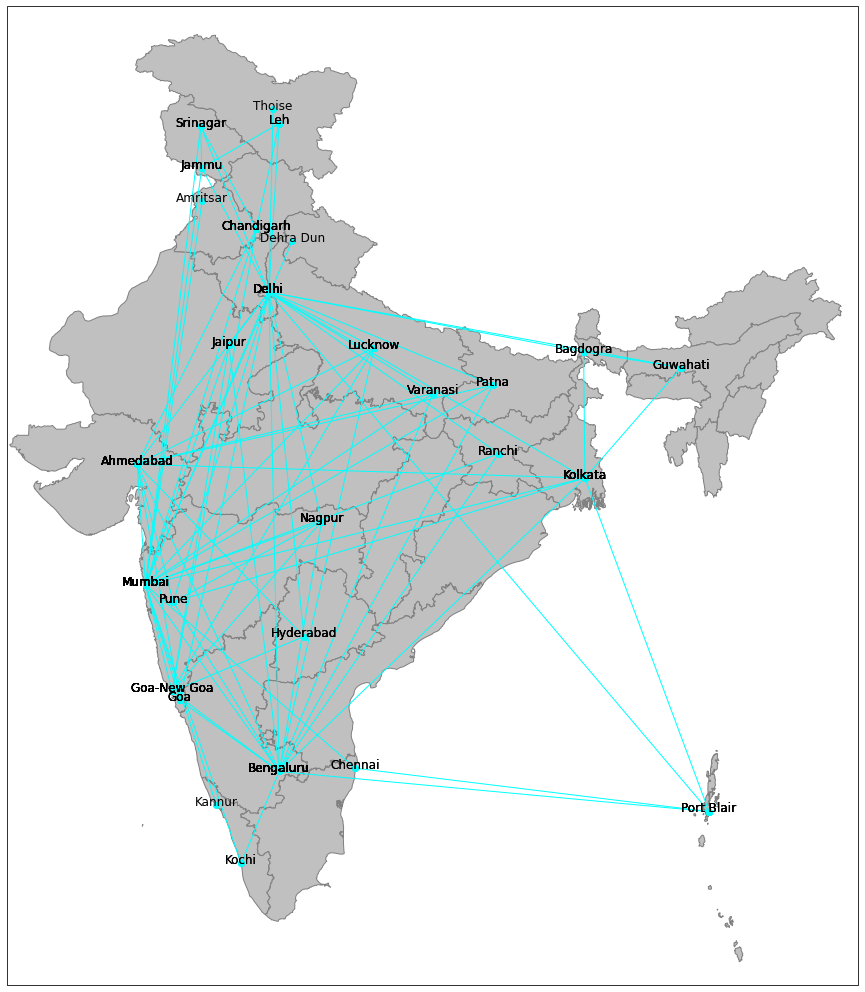

In [ ]:
gdf = geo.read_file("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")

plt.figure(figsize=(18,18))

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=px, facecolor='silver', edgecolor='grey')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

unique_routes=[]
cities=[]

ax = plt.axes(projection=ccrs.PlateCarree())

for i in range(len(df)):
    lat1, lon1 = b[df["Origin"][i]][0], b[df["Origin"][i]][1]
    lat2, lon2 = b[df["Destination"][i]][0], b[df["Destination"][i]][1]

    if [df["Origin"][i],df["Destination"][i]] not in unique_routes and [df["Destination"][i],df["Origin"][i]] not in unique_routes and 68<lon1<98 and 68<lon2<98 and 6<lat1<37 and 6<lat2<37:
        unique_routes.append([df["Origin"][i],df["Destination"][i]])


        plt.plot([lon1, lon2], [lat1, lat2], linewidth=1, color="cyan", marker='o',transform=ccrs.Geodetic())

        # if df["Origin"][i] not in cities:
        #     cities.append(df["Origin"][i])
        plt.text(lon1, lat1, df["Origin"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic())

        # if df["Destination"][i] not in cities:
        #     cities.append(df["Destination"][i])
        plt.text(lon2, lat2, df["Destination"][i], color="black", fontsize=12, horizontalalignment="center",transform=ccrs.Geodetic())

plt.show()

In [ ]:
unique_routes=[]
cities=[]
unique_routes_count=[]

for i in range(len(df)):
    lat1, lon1 = b[df["Origin"][i]][0], b[df["Origin"][i]][1]
    lat2, lon2 = b[df["Destination"][i]][0], b[df["Destination"][i]][1]

    if 68<lon1<98 and 68<lon2<98 and 6<lat1<37 and 6<lat2<37:
        if [df["Origin"][i],df["Destination"][i]] not in unique_routes and [df["Destination"][i],df["Origin"][i]] not in unique_routes:
            unique_routes.append([df["Origin"][i],df["Destination"][i]])
            unique_routes_count.append(1)

        else:
            if [df["Origin"][i],df["Destination"][i]] in unique_routes:
                unique_routes_count[unique_routes.index([df["Origin"][i],df["Destination"][i]])]+=1
            else:
                unique_routes_count[unique_routes.index([df["Destination"][i],df["Origin"][i]])]+=1




In [ ]:
for i in range(len(unique_routes)):
    print(unique_routes[i],unique_routes_count[i])

['Ahmedabad', 'Bengaluru'] 4
['Ahmedabad', 'Chandigarh'] 5
['Ahmedabad', 'Delhi'] 9
['Ahmedabad', 'Goa'] 9
['Ahmedabad', 'Hyderabad'] 2
['Ahmedabad', 'Kolkata'] 2
['Ahmedabad', 'Lucknow'] 2
['Ahmedabad', 'Mumbai'] 15
['Ahmedabad', 'Patna'] 2
['Ahmedabad', 'Pune'] 2
['Ahmedabad', 'Varanasi'] 2
['Amritsar', 'Mumbai'] 9
['Bagdogra', 'Delhi'] 7
['Bagdogra', 'Guwahati'] 1
['Bagdogra', 'Kolkata'] 2
['Bengaluru', 'Delhi'] 6
['Bengaluru', 'Goa'] 2
['Bengaluru', 'Goa-New Goa'] 3
['Bengaluru', 'Jaipur'] 2
['Bengaluru', 'Kochi'] 2
['Bengaluru', 'Kolkata'] 2
['Bengaluru', 'Lucknow'] 2
['Bengaluru', 'Mumbai'] 12
['Bengaluru', 'Nagpur'] 2
['Bengaluru', 'Patna'] 2
['Bengaluru', 'Port Blair'] 2
['Bengaluru', 'Pune'] 4
['Bengaluru', 'Ranchi'] 2
['Bengaluru', 'Varanasi'] 3
['Chandigarh', 'Goa-New Goa'] 2
['Chandigarh', 'Leh'] 2
['Chandigarh', 'Mumbai'] 8
['Chandigarh', 'Srinagar'] 5
['Chennai', 'Mumbai'] 5
['Chennai', 'Port Blair'] 4
['Dehra Dun', 'Mumbai'] 4
['Delhi', 'Goa'] 5
['Delhi', 'Guwahati'] 3
[

####Routes having more than 5 flights

<ipython-input-152-a5d2cfcb138a>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


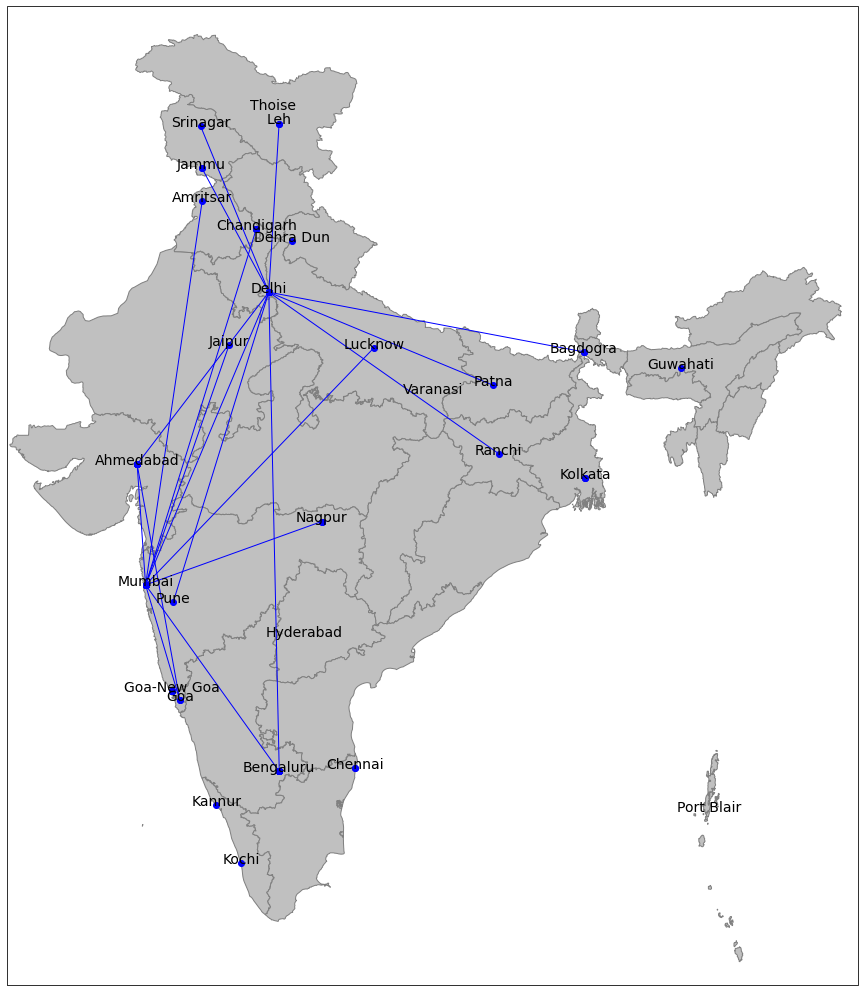

In [ ]:
gdf = geo.read_file("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")

plt.figure(figsize=(18,18))

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=px, facecolor='silver', edgecolor='grey')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

cities=[]

ax = plt.axes(projection=ccrs.PlateCarree())

for i in range(len(unique_routes)):
    lat1, lon1 = b[unique_routes[i][0]][0], b[unique_routes[i][0]][1]
    lat2, lon2 = b[unique_routes[i][1]][0], b[unique_routes[i][1]][1]

    if unique_routes_count[i]>5:
        plt.plot([lon1, lon2], [lat1, lat2], linewidth=1, color="blue", marker='o',transform=ccrs.Geodetic())
    else:
        plt.scatter(lon1, lat1, color="blue", marker='o',transform=ccrs.Geodetic())

    if unique_routes[i][0] not in cities:
        cities.append(unique_routes[i][0])
        plt.text(lon1, lat1, unique_routes[i][0], color="black", fontsize=14, horizontalalignment="center",transform=ccrs.Geodetic())

    if unique_routes[i][1] not in cities:
        cities.append(unique_routes[i][1])
        plt.text(lon2, lat2, unique_routes[i][1], color="black", fontsize=14, horizontalalignment="center",transform=ccrs.Geodetic())


plt.show()

####trying to use colour density to show frequency of routes

In [ ]:
import matplotlib.cm as cm
import numpy as np

blue_cmap = cm.get_cmap('Blues')
blue_colors = blue_cmap(np.linspace(0.25, 1, 6))

<ipython-input-143-94d16fee1e93>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


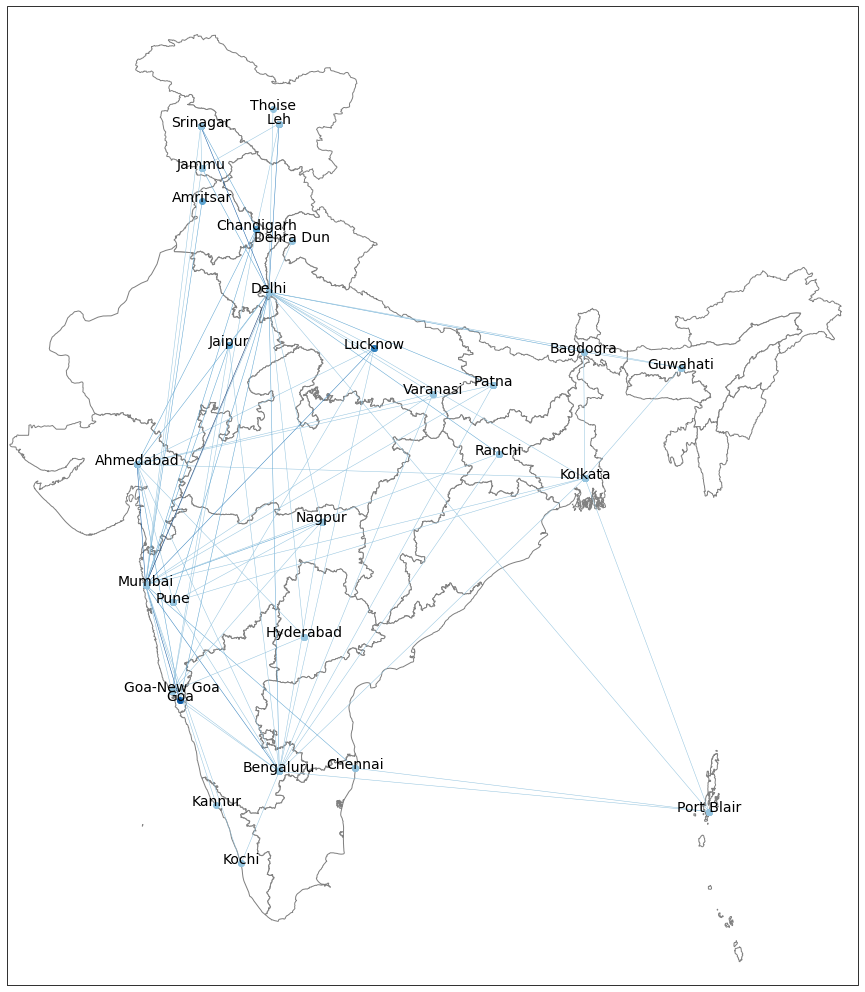

In [ ]:
cgdf = geo.read_file("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson")

plt.figure(figsize=(18,18))

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=px, facecolor='white', edgecolor='grey')
px.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

cities=[]

ax = plt.axes(projection=ccrs.PlateCarree())

for i in range(len(unique_routes)):
    lat1, lon1 = b[unique_routes[i][0]][0], b[unique_routes[i][0]][1]
    lat2, lon2 = b[unique_routes[i][1]][0], b[unique_routes[i][1]][1]

    plt.plot([lon1, lon2], [lat1, lat2], linewidth=0.5, color=blue_colors[1+unique_routes_count[i]//5], marker='o',transform=ccrs.Geodetic())

    if unique_routes[i][0] not in cities:
        cities.append(unique_routes[i][0])
        plt.text(lon1, lat1, unique_routes[i][0], color="black", fontsize=14, horizontalalignment="center",transform=ccrs.Geodetic())

    if unique_routes[i][1] not in cities:
        cities.append(unique_routes[i][1])
        plt.text(lon2, lat2, unique_routes[i][1], color="black", fontsize=14, horizontalalignment="center",transform=ccrs.Geodetic())


plt.show()